<a href="https://colab.research.google.com/github/MuayThaiLegz/Class-practice/blob/master/PrepForTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO


In [ ]:


url = "https://www.cde.ca.gov/ds/ad/fileshse.asp"

response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table")

rows = table.find_all("tr")

base_url = "https://www3.cde.ca.gov/demo-downloads/homeless/"

all_data = []

for row in rows[1:]:  # Skipping the header row
    columns = row.find_all("td")
    year = columns[0].text.strip()
    file_name = columns[1].find("a").text.strip()
    file_url = base_url + columns[1].find("a")["href"].split('/')[-1]  # Correct the URL

    file_response = requests.get(file_url)
    file_content = file_response.content

    try:
        df = pd.read_csv(StringIO(file_content.decode('utf-8')), delimiter='\t')
    except UnicodeDecodeError:
        df = pd.read_csv(StringIO(file_content.decode('ISO-8859-1')), delimiter='\t')

    df['Year'] = year

    all_data.append(df)

merged_df = pd.concat(all_data, ignore_index=True)

# merged_df.to_csv('homeless_student_enrollment_data.csv', index=False)


In [ ]:
# Load and clean the homeless student enrollment data, then display key information such as the first few rows, data structure, descriptive statistics, and column names.


homelessdata = merged_df.dropna() #pd.read_csv('/content/homeless_student_enrollment_data.csv').dropna()

print("Head of the DataFrame:")
display(homelessdata.head())

print("\nDataFrame Info:")
homelessdata.info()

print("\nDescriptive Statistics:")
formatted_stats = homelessdata.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
display(formatted_stats)

print("\nColumn Names:")
display(homelessdata.columns)


Head of the DataFrame:


,Academic Year,Aggregate Level,County Code,District Code,School Code,County Name,District Name,School Name,Charter School,DASS,...,Temporary Shelters,Hotels/Motels,Temporarily Unsheltered,Missing/Unknown,Temporarily Doubled Up (percent),Temporary Shelters (percent),Hotels/Motels (percent),Temporarily Unsheltered (percent),Missing/Unknown (percent),Year
3505,2022-23,S,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,Yes,...,0,0,0,0,100.0,0.0,0.0,0.0,0.0,2022–23
3506,2022-23,S,1,10017.0,130401.0,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,No,Yes,...,41,5,1,0,4.1,83.7,10.2,2.0,0.0,2022–23
3507,2022-23,S,1,10017.0,130625.0,Alameda,Alameda County Office of Education,Alternatives in Action,Yes,Yes,...,0,0,0,0,100.0,0.0,0.0,0.0,0.0,2022–23
3508,2022-23,S,1,10017.0,137448.0,Alameda,Alameda County Office of Education,Aurum Preparatory Academy,Yes,No,...,0,0,1,0,0.0,0.0,0.0,100.0,0.0,2022–23
3509,2022-23,S,1,10017.0,123968.0,Alameda,Alameda County Office of Education,Community School for Creative Education,Yes,No,...,0,1,0,0,0.0,0.0,100.0,0.0,0.0,2022–23



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 42633 entries, 3505 to 589133
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Academic Year                      42633 non-null  object 
 1   Aggregate Level                    42633 non-null  object 
 2   County Code                        42633 non-null  int64  
 3   District Code                      42633 non-null  float64
 4   School Code                        42633 non-null  float64
 5   County Name                        42633 non-null  object 
 6   District Name                      42633 non-null  object 
 7   School Name                        42633 non-null  object 
 8   Charter School                     42633 non-null  object 
 9   DASS                               42633 non-null  object 
 10  Reporting Category                 42633 non-null  object 
 11  Cumulative Enrollment              426

,County Code,District Code,School Code,Cumulative Enrollment,Homeless Student Enrollment
count,42633.000000,42633.000000,42633.000000,42633.000000,42633.000000
mean,28.784557,65574.087772,3965866.180377,612.715408,23.035724
std,14.062673,11388.874089,2650699.802328,612.330636,45.124269
min,1.000000,10017.000000,0.000000,1.000000,0.000000
25%,19.000000,64733.000000,137406.000000,284.000000,1.000000
50%,30.000000,67090.000000,6012199.000000,501.000000,8.000000
75%,38.000000,69641.000000,6048680.000000,736.000000,25.000000
max,58.000000,77388.000000,9010745.000000,27369.000000,1140.000000



Column Names:


Index(['Academic Year', 'Aggregate Level', 'County Code', 'District Code',
       'School Code', 'County Name', 'District Name', 'School Name',
       'Charter School', 'DASS', 'Reporting Category', 'Cumulative Enrollment',
       'Homeless Student Enrollment', 'Temporarily Doubled Up',
       'Temporary Shelters', 'Hotels/Motels', 'Temporarily Unsheltered',
       'Missing/Unknown', 'Temporarily Doubled Up (percent)',
       'Temporary Shelters (percent)', 'Hotels/Motels (percent)',
       'Temporarily Unsheltered (percent)', 'Missing/Unknown (percent)',
       'Year'],
      dtype='object')

In [ ]:
# Convert specific columns related to homeless student enrollment and housing situations to numeric types for accurate analysis, handling any conversion errors by coercing them into NaN.

cols_to_convert = [
    'Temporarily Doubled Up', 'Temporary Shelters', 'Hotels/Motels',
    'Temporarily Unsheltered', 'Missing/Unknown', 'Temporarily Doubled Up (percent)',
    'Temporary Shelters (percent)', 'Hotels/Motels (percent)',
    'Temporarily Unsheltered (percent)', 'Missing/Unknown (percent)'
]

for col in cols_to_convert:
    homelessdata[col] = pd.to_numeric(homelessdata[col], errors='coerce')


<ipython-input-10-bc587dc7a7e9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homelessdata[col] = pd.to_numeric(homelessdata[col], errors='coerce')


In [ ]:
print("Post numeric convertion:")
homelessdata.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


Post numeric convertion:


,County Code,District Code,School Code,Cumulative Enrollment,Homeless Student Enrollment,Temporarily Doubled Up,Temporary Shelters,Hotels/Motels,Temporarily Unsheltered,Missing/Unknown,Temporarily Doubled Up (percent),Temporary Shelters (percent),Hotels/Motels (percent),Temporarily Unsheltered (percent),Missing/Unknown (percent)
count,42633.000000,42633.000000,42633.000000,42633.000000,42633.000000,42633.000000,42633.000000,42633.000000,42633.000000,42633.000000,42633.000000,42633.000000,42633.000000,42633.000000,42633.000000
mean,28.784557,65574.087772,3965866.180377,612.715408,23.035724,19.323646,1.486853,1.351465,0.847184,0.026576,60.220050,8.507539,8.282453,4.329074,0.099275
std,14.062673,11388.874089,2650699.802328,612.330636,45.124269,40.880564,6.562736,3.458394,3.053971,0.797686,38.638630,18.429853,17.542359,12.394659,1.711820
min,1.000000,10017.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,64733.000000,137406.000000,284.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,67090.000000,6012199.000000,501.000000,8.000000,5.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,69641.000000,6048680.000000,736.000000,25.000000,19.000000,1.000000,2.000000,1.000000,0.000000,94.700000,8.300000,8.700000,1.900000,0.000000
max,58.000000,77388.000000,9010745.000000,27369.000000,1140.000000,992.000000,608.000000,212.000000,167.000000,107.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
# Trend Analysis: Line Plot of Homeless Student Enrollment Over Years
trend_data = homelessdata.groupby('Year')['Homeless Student Enrollment'].sum().reset_index()

fig_trend = px.line(trend_data, x='Year', y='Homeless Student Enrollment', markers=True,
                    title='Trend of Homeless Student Enrollment Over Years')
fig_trend.update_layout(xaxis_title='Year', yaxis_title='Total Homeless Student Enrollment')
fig_trend.show()

In [ ]:
fig_hist = px.histogram(homelessdata, x='Homeless Student Enrollment', nbins=50,
                        title='Distribution of Homeless Student Enrollment', marginal='violin')
fig_hist.update_layout(xaxis_title='Number of Homeless Students', yaxis_title='Frequency')
fig_hist.show()


In [ ]:
correlation_matrix = homelessdata.select_dtypes(np.number).corr()

fig_corr = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.index,
                   colorscale='Viridis'))

fig_corr.update_layout(title='Correlation Matrix of Homeless Student Enrollment Variables',
                       xaxis_title='Variables', yaxis_title='Variables')
fig_corr.show()

In [ ]:
fig_box = px.box(homelessdata, x='Year', y='Homeless Student Enrollment',
                 title='Box Plot of Homeless Student Enrollment by Year')
fig_box.update_layout(xaxis_title='Year', yaxis_title='Homeless Student Enrollment')
fig_box.show()


In [ ]:
top_counties = homelessdata.groupby('County Name')['Homeless Student Enrollment'].sum().nlargest(25).reset_index()

fig_bar = px.bar(top_counties, x='County Name', y='Homeless Student Enrollment',
                 title='Top 10 Counties by Homeless Student Enrollment')
fig_bar.update_layout(xaxis_title='County Name', yaxis_title='Total Homeless Student Enrollment')
fig_bar.show()


In [ ]:
import statsmodels.api as sm

X = homelessdata['Cumulative Enrollment']
y = homelessdata['Homeless Student Enrollment']

X = sm.add_constant(X)

modelOLS = sm.OLS(y, X).fit()

print(modelOLS.summary())


                                 OLS Regression Results                                
Dep. Variable:     Homeless Student Enrollment   R-squared:                       0.168
Model:                                     OLS   Adj. R-squared:                  0.168
Method:                          Least Squares   F-statistic:                     8590.
Date:                         Wed, 21 Aug 2024   Prob (F-statistic):               0.00
Time:                                 15:53:43   Log-Likelihood:            -2.1899e+05
No. Observations:                        42633   AIC:                         4.380e+05
Df Residuals:                            42631   BIC:                         4.380e+05
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

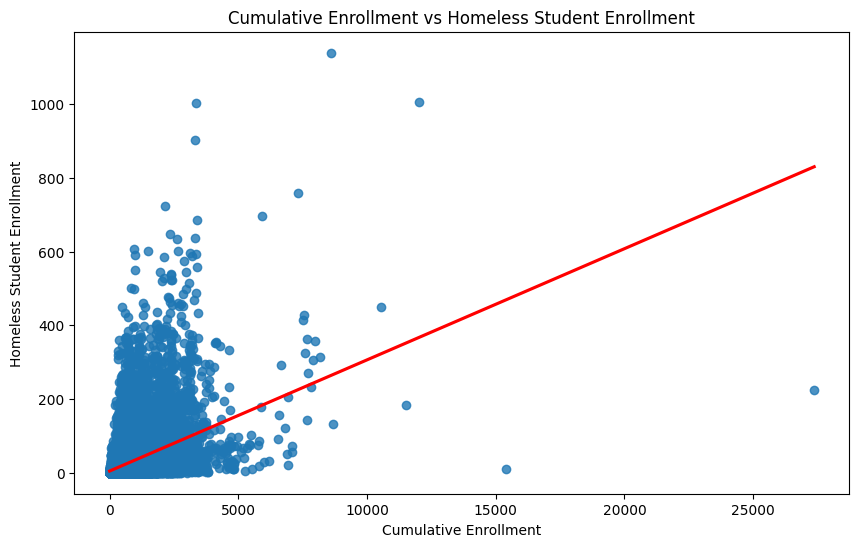

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line for Cumulative Enrollment
plt.figure(figsize=(10, 6))
sns.regplot(x=X['Cumulative Enrollment'], y=y, line_kws={"color":"red"}, ci=None)
plt.xlabel('Cumulative Enrollment')
plt.ylabel('Homeless Student Enrollment')
plt.title('Cumulative Enrollment vs Homeless Student Enrollment')
plt.show()


Interpretation:

Cumulative Enrollment has a positive and significant coefficient, indicating that as the total enrollment increases by one unit, the number of homeless students increases by about 0.0302. However, since the R-squared is low, this variable alone doesn't capture much of the variability in the dependent variable.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [ ]:
X = homelessdata[['Cumulative Enrollment', 'Temporarily Doubled Up', 'Temporary Shelters',
                  'Hotels/Motels', 'Temporarily Unsheltered']]

y = homelessdata['Homeless Student Enrollment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared: 0.9998904449466031
Mean Squared Error: 0.24687345271373445
Coefficients: [1.14757151e-05 9.99368935e-01 1.02649770e+00 1.01213516e+00
 1.03129675e+00]
Intercept: -0.04989818950290825


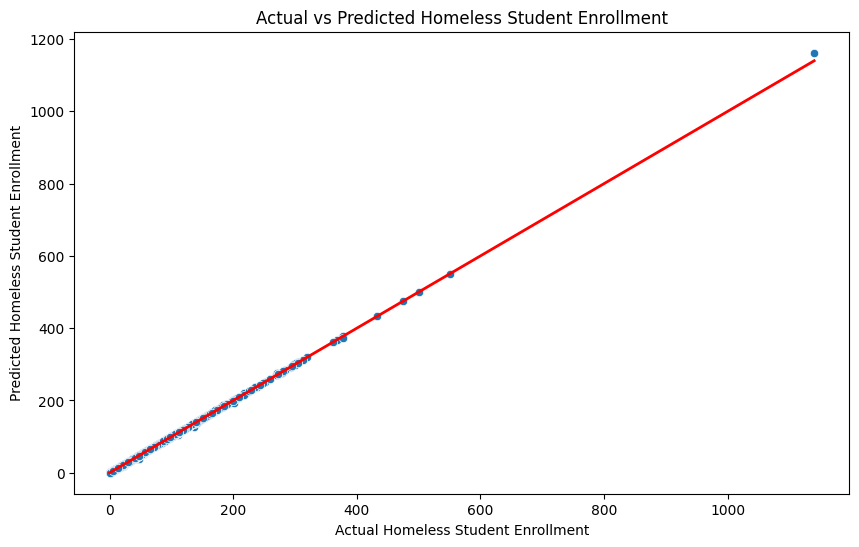

In [ ]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Homeless Student Enrollment')
plt.ylabel('Predicted Homeless Student Enrollment')
plt.title('Actual vs Predicted Homeless Student Enrollment')
plt.show()


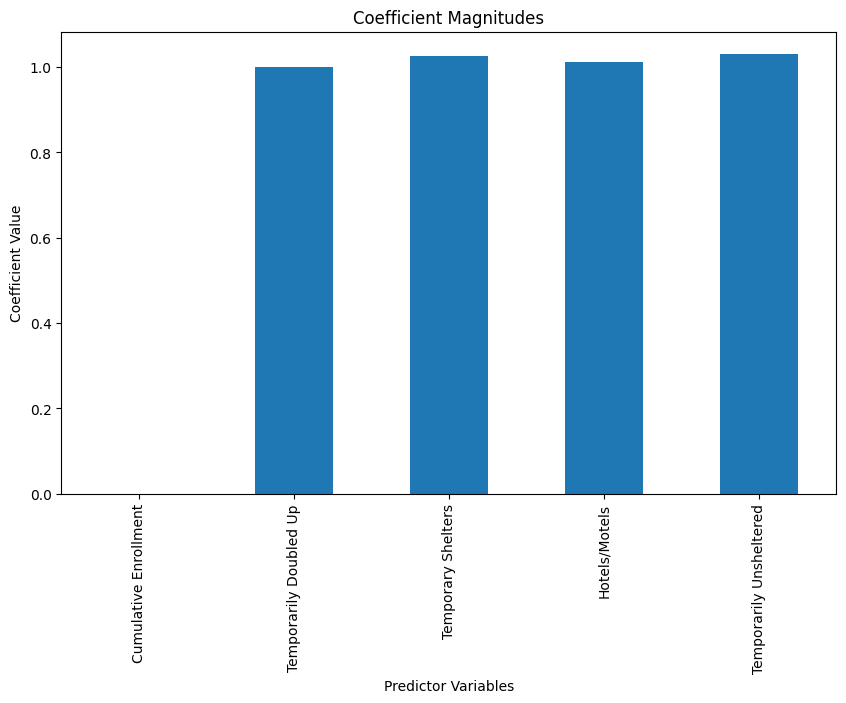

In [ ]:
import numpy as np

# Bar plot of coefficients
coefficients = pd.Series(model.coef_, index=X.columns)

plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar')
plt.title('Coefficient Magnitudes')
plt.xlabel('Predictor Variables')
plt.ylabel('Coefficient Value')
plt.show()


Interpretation:

Cumulative Enrollment has a very small but positive impact on Homeless Student Enrollment, suggesting that as the total enrollment increases, the number of homeless students slightly increases.
Temporarily Doubled Up, Temporary Shelters, Hotels/Motels, and Temporarily Unsheltered all have coefficients close to or slightly above 1, indicating a near one-to-one relationship with Homeless Student Enrollment. This suggests that increases in these temporary housing situations lead directly to increases in the number of homeless students.

## Conclusion
Comparison and Insights
Model Fit:
The multiple linear regression model has a much higher R-squared value (0.99989) compared to the simple linear regression model (0.168). This significant difference shows that when we consider multiple factors together in the scikit-learn model, we get a much clearer and more accurate picture of what drives homeless student enrollment. It suggests that homelessness among students isn't just about how many students are enrolled in a school; it's influenced by a variety of factors, and capturing these gives us a much better understanding of the situation.

Coefficient Interpretation:
In the simple linear regression model, Cumulative Enrollment has a higher coefficient (0.0302) than in the multiple regression model (1.14757151e-05). This tells us that when we look at Cumulative Enrollment in isolation, it seems to have a bigger impact on homeless student enrollment. However, once we consider other factors, like temporary housing situations, the influence of Cumulative Enrollment drops significantly. This suggests that while enrollment numbers matter, their impact is heavily intertwined with other factors, and when these are taken into account, the direct effect of enrollment on homelessness is much less significant.

Predictive Power:
The scikit-learn model, which includes multiple predictors, is far better at predicting homeless student enrollment. This is reflected in its nearly perfect R-squared value and low Mean Squared Error (MSE). Which could be overfitting but still highlights the importance of considering factors like whether students are temporarily doubled up, living in shelters, motels, or unsheltered. These variables are crucial for understanding and predicting how many students are experiencing homelessness.

Conclusion
Multiple Regression: By including a variety of factors related to temporary housing, the multiple regression model gives a much more comprehensive and accurate picture of homeless student enrollment. This model should be the go-to for making predictions and understanding the factors that contribute to homelessness among students.

Simple Regression: Although it's easier to understand and use, relying only on Cumulative Enrollment for predicting homeless student enrollment is far less effective. This model shows the importance of looking at multiple variables when trying to understand complex issues like student homelessness.

This comparison underscores the need to consider multiple aspects of a problem to fully understand it, especially when dealing with something as complex and multifaceted as homelessness among students.